<a href="https://colab.research.google.com/github/KevinaZeni/Titanic_datasets-email_classification/blob/main/Titanic_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting survival on the Titanic Passengers

#**1. Defining the Question**

**a)Specifying the Data Analytic Question**

This weeks project requires us to  implement a K-nearest neighbor (kNN) classifier on the two datasets provided to predict the survival of passengers on the titanic.

**b) Defining the Metric of Success**

The project is a classification problem. We will need to build a KNN model that corrrectly predicts the survival of passengers.
We will need to find the best parameter and evaluate the performance based on the accuracy score, f1 score. We will aim for an accuracy score of at least 85%

**c) Understanding the context**

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. 
There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

About the dataset

The Titanic dataset. A classic dataset used in many data mining tutorials and demos. Perfect for exploratory analysis and building binary classification models to predict survival. Data covers passengers only, not crew.


Titanic Data Glossary

Column description: pclass = passenger class (1 = 1st; 2 = 2nd; 3 = 3rd) survived = Survival (False = No; True = Yes) name = Name sex = Sex sibsp = Number of Siblings/Spouses Aboard parch = Number of Parents/Children Aboard ticket = Ticket Number fare = Passenger Fare cabin = Cabin embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) boat = Lifeboat (if survived) body = Body number (if did not survive and body was recovered) home_dest = Passenger destination


**Recording the Experimental Design**


*  Data Preparation
*  Data Cleaning
*  Exploratory Data Analysis
*  Implementing the solution: 

*   Building the Model : K-Nearest Neighbors Classifier (KNN)

*   Hyperparameter tuning & Optimization techniques

*   Challenging the Solution: Random Forest 
*   Conclusion and Recommendations




#**Data Preparation**

**Importing our libraries**

In [1]:
#Data
import pandas as pd  
import numpy as np  


# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ML
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor, 
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# for KNN:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

**Loading our datasets**

We have two datasets for this exercise, the train and test datasets

In [2]:
##Loading the train dataset

train = pd.read_csv('train.csv')

train_df = train.copy()

In [3]:
test = pd.read_csv('test.csv')

In [4]:
#Previewing the first ten records of our train dataset

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#Previewing the last 10 records of our train set

train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
#Previewing the first 10 records of our test dataset

test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
#Previewing the last 10 records of our test set
test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**Accessing basic information about our datasets**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**checking the appropriateness of our data**

In [10]:
test.shape

(418, 11)

In [11]:
train.shape

(891, 12)

In [12]:
##Columns

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We will later need to convert some of these features into numeric form for the algorith to process them 

In [16]:
##Checking for unique values

cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cols:
  print(col)
  print(train[col].unique())
  print('\n')

Pclass
[3 1 2]


Sex
['male' 'female']


SibSp
[1 0 3 4 2 5 8]


Parch
[0 1 2 5 3 4 6]


Embarked
['S' 'C' 'Q' nan]




In [17]:
#Confirming that this is true for the test set

cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cols:
  print(col)
  print(test[col].unique())
  print('\n')

Pclass
[3 2 1]


Sex
['male' 'female']


SibSp
[0 1 2 3 4 5 8]


Parch
[0 1 3 2 4 6 5 9]


Embarked
['Q' 'S' 'C']




There are subtle differences in the unique values in Parch and Embarked which we are going to explore and deal  with at the EDA section

The train set has 891 records and 11 features and the target variable [survived]. The test set has 418 records and 11 features.

**Validation of Data**

The data provided according to external sources looks at what factors or classifications of passengers have a persuasive
relationship towards survival for passengers. The target has two classes. The dataset therefore can be considered appropriate to train the KNN model on survival of the titanic

**Tidying the dataset**

*Missing values*

In [18]:
##Train set total missing values

train.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [19]:
#Getting the percentage of our missing values
train.isnull().sum()/train.isnull().count()*100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
##Dealing with missing data
## The cabin column seems to have a very high % of missing values which we will drop
## As for the age column, we will have to fill the missing values with its mean
##and drop the two missing records on embarked
##Passenger ID does not look that important a feature for our model hence we will drop it

In [22]:
##
train.drop(['Cabin','PassengerId'], inplace=True, axis = 1)

In [23]:
train.dropna(subset=['Embarked'],inplace=True)

In [24]:
##
data = [train, test]
for dataset in data:
    dataset['Age']= dataset['Age'].fillna(dataset['Age'].mean(), axis = 0)

#.fillna(train['Age'].mean(), axis = 0)

In [25]:
##Confirming that we no longer have missing values
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [26]:
####Test set total missing values

test.isnull().sum().sort_values(ascending=False)

Cabin          327
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [27]:
test.drop(['Cabin','PassengerId'], inplace=True, axis = 1)

In [28]:
test.dropna(subset=['Fare'], inplace=True, axis = 0)

In [29]:
#test['Age']= test['Age'].fillna(test['Age'].mean(), axis= 0)

In [30]:
##Confirming that we no longer have missing values
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [31]:
##Checking the new shape of our data

train.shape



(889, 10)

In [32]:
test.shape

(417, 9)

*Checking for duplicates*

In [33]:
#we will look for the number of rows with duplicate records in both our train and test sets
print(train.duplicated().sum())

print(test.duplicated().sum())

#There are no duplicated records

0
0


*Checking for outliers*

In [34]:
##Train set

columns = train[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
Q1 = columns.quantile(0.25)
Q3 = columns.quantile(0.75)
IQR = Q3 - Q1
((columns < (Q1 - 1.5 * IQR)) | (columns > (Q3 + 1.5 * IQR))).sum()


Survived      0
Pclass        0
Age          65
SibSp        46
Parch       213
Fare        114
dtype: int64

In [35]:
##Test set

columns = test[['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
Q1 = columns.quantile(0.25)
Q3 = columns.quantile(0.75)
IQR = Q3 - Q1
((columns < (Q1 - 1.5 * IQR)) | (columns > (Q3 + 1.5 * IQR))).sum()

Pclass     0
Age       37
SibSp     11
Parch     94
Fare      55
dtype: int64

We will not drop the outliers for now, we nee to investigate more on their effect on our analysis

*More data cleaning procedures*

In [36]:
##We need to change some dtypes and encode some of our features

In [37]:
columns=["Sex","Embarked"]
from sklearn.preprocessing import LabelEncoder
for col in columns:
 labelencoder = LabelEncoder()
  
 labelencoder.fit(train[col])
 train[col] = labelencoder.transform(train[col])
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked      int64
dtype: object

In [38]:
columns=["Sex","Embarked"]
from sklearn.preprocessing import LabelEncoder
for col in columns:
 labelencoder = LabelEncoder()
  
 labelencoder.fit(test[col])
 test[col] = labelencoder.transform(test[col])
test.dtypes

Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked      int64
dtype: object

In [39]:
##We will encode data in both the train and test datasets

#embarked = {"S": 0, "C": 1, "Q": 2}
#data = [train, test]

#for dataset in data:
#    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [40]:
##We will encode the sex column in both the train and test datasets
#sex = {"male":0, "female":1}

#data = [train, test]

#for dataset in data:
#  dataset['Sex'] = dataset['Sex'].map(sex)

In [41]:
##We will convert the dtypes of the fare and age category to int64 type

train['Fare'] = train['Fare'].astype(int)
train['Age'] = train['Age'].astype(int)

    

In [42]:
##We will convert the dtypes of the fare and age category to int64 type

test['Fare'] = test['Fare'].astype(int)
test['Age'] = test['Age'].astype(int)

In [43]:
##We will drop the Name and Ticket columns as we will not be using them for now

In [44]:
train.drop(['Name','Ticket'], inplace=True, axis = 1)
test.drop(['Name','Ticket'], inplace=True, axis = 1)

In [45]:
train.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
dtype: object

In [46]:
test.dtypes

Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
dtype: object

#**Exploratory Data Analysis**

In [47]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.498313,0.524184,0.382452,31.677165,1.535433
std,0.486260,0.834700,0.477538,12.979638,1.103705,0.806761,49.706915,0.792088
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000,2.000000


**Measures of Central tendancy**

In [48]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [49]:
#MEAN
colums_ = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]

for i, col_val in enumerate(colums_):
 print('The mean of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].mean()))

The mean of Survived is 0.38245219347581555
The mean of Pclass is 2.3115860517435323
The mean of Sex is 0.6490438695163104
The mean of Age is 29.498312710911136
The mean of SibSp is 0.5241844769403825
The mean of Parch is 0.38245219347581555
The mean of Fare is 31.677165354330707
The mean of Embarked is 1.5354330708661417


In [50]:
#MEDIAN
for i, col_val in enumerate(colums_):
 print('The median of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].median()))

The median of Survived is 0.0
The median of Pclass is 3.0
The median of Sex is 1.0
The median of Age is 29.0
The median of SibSp is 0.0
The median of Parch is 0.0
The median of Fare is 14.0
The median of Embarked is 2.0


In [51]:
#MODE
for i, col_val in enumerate(colums_):
 print('The mode of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].mode()))

The mode of Survived is 0    0
dtype: int64
The mode of Pclass is 0    3
dtype: int64
The mode of Sex is 0    1
dtype: int64
The mode of Age is 0    29
dtype: int64
The mode of SibSp is 0    0
dtype: int64
The mode of Parch is 0    0
dtype: int64
The mode of Fare is 0    7
dtype: int64
The mode of Embarked is 0    2
dtype: int64


**Measures of dispersion**

In [52]:
#SKEWNESS
for i, col_val in enumerate(colums_):
 print('The skewness of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].skew()))

The skewness of Survived is 0.4845676297760328
The skewness of Pclass is -0.6369977585999191
The skewness of Sex is -0.6256254596365592
The skewness of Age is 0.4569465528010798
The skewness of SibSp is 3.6910576308362284
The skewness of Parch is 2.74516012611158
The skewness of Fare is 4.8008132483777715
The skewness of Embarked is -1.2613666627421083


In [53]:
##KUROSIS

for i, col_val in enumerate(colums_):
 print('The kurtosis of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].kurt()))

The kurtosis of Survived is -1.7691794454365986
The kurtosis of Pclass is -1.2694374832322646
The kurtosis of Sex is -1.612224913063432
The kurtosis of Age is 0.9998448179824204
The kurtosis of SibSp is 17.838972378994782
The kurtosis of Parch is 9.750591705579096
The kurtosis of Fare is 33.51127273742673
The kurtosis of Embarked is -0.21609959440636795


In [54]:
##RANGE

x = {}

for col in colums_:
    x[col] = train[col].max()- train[col].min()
range_= pd.Series(x)
range_

Survived      1
Pclass        2
Sex           1
Age          80
SibSp         8
Parch         6
Fare        512
Embarked      2
dtype: int64

In [55]:
##Standard Deviation

x = {}

for col in colums_:
    x[col] = train[col].std()
standard_dev_= pd.Series(x)
standard_dev_

Survived     0.486260
Pclass       0.834700
Sex          0.477538
Age         12.979638
SibSp        1.103705
Parch        0.806761
Fare        49.706915
Embarked     0.792088
dtype: float64

**Univariate Visualizations**

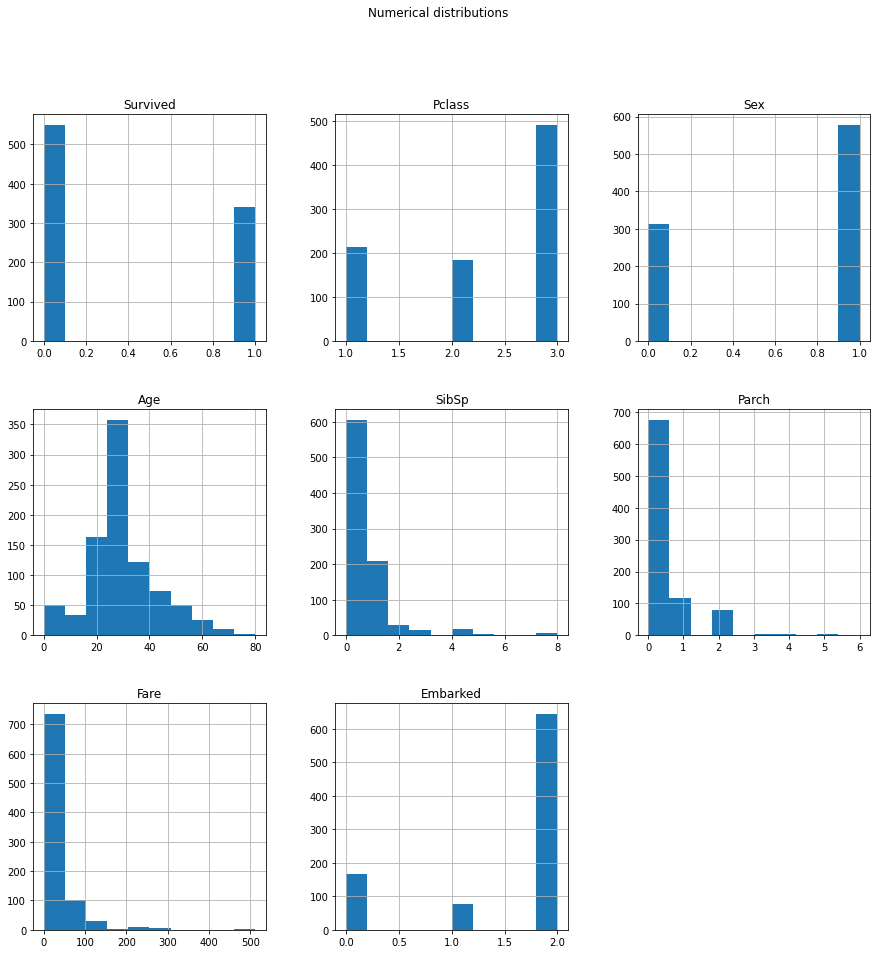

In [56]:
train.hist(bins=10, figsize=(15,15))
plt.suptitle("Numerical distributions")
plt.savefig('Histogram')
plt.show()

In [57]:
#Frequenct table of our y variable
train.Survived.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [58]:
##Univariate Analysis Summaries
#1. Most of our features have a  positively skewed distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer
#2. Our SibSp and Parch and Fare have a leptokurtic distribution which shows heavy tails on either side, indicating large outliers.
#3. Most of the passengers are aged 20-40
#4. Most of the passengers were in PClass 3
#5. Most of the passengers were male
#6. Most of the passengers paid 0-50$ fare
#7. Most of the passengers embarked at S - Southampton
#8. Most of the passengers had 0 or 1 siblings or parents 
#9. Only 38% of our passengers survived

**Bivariate Analysis**

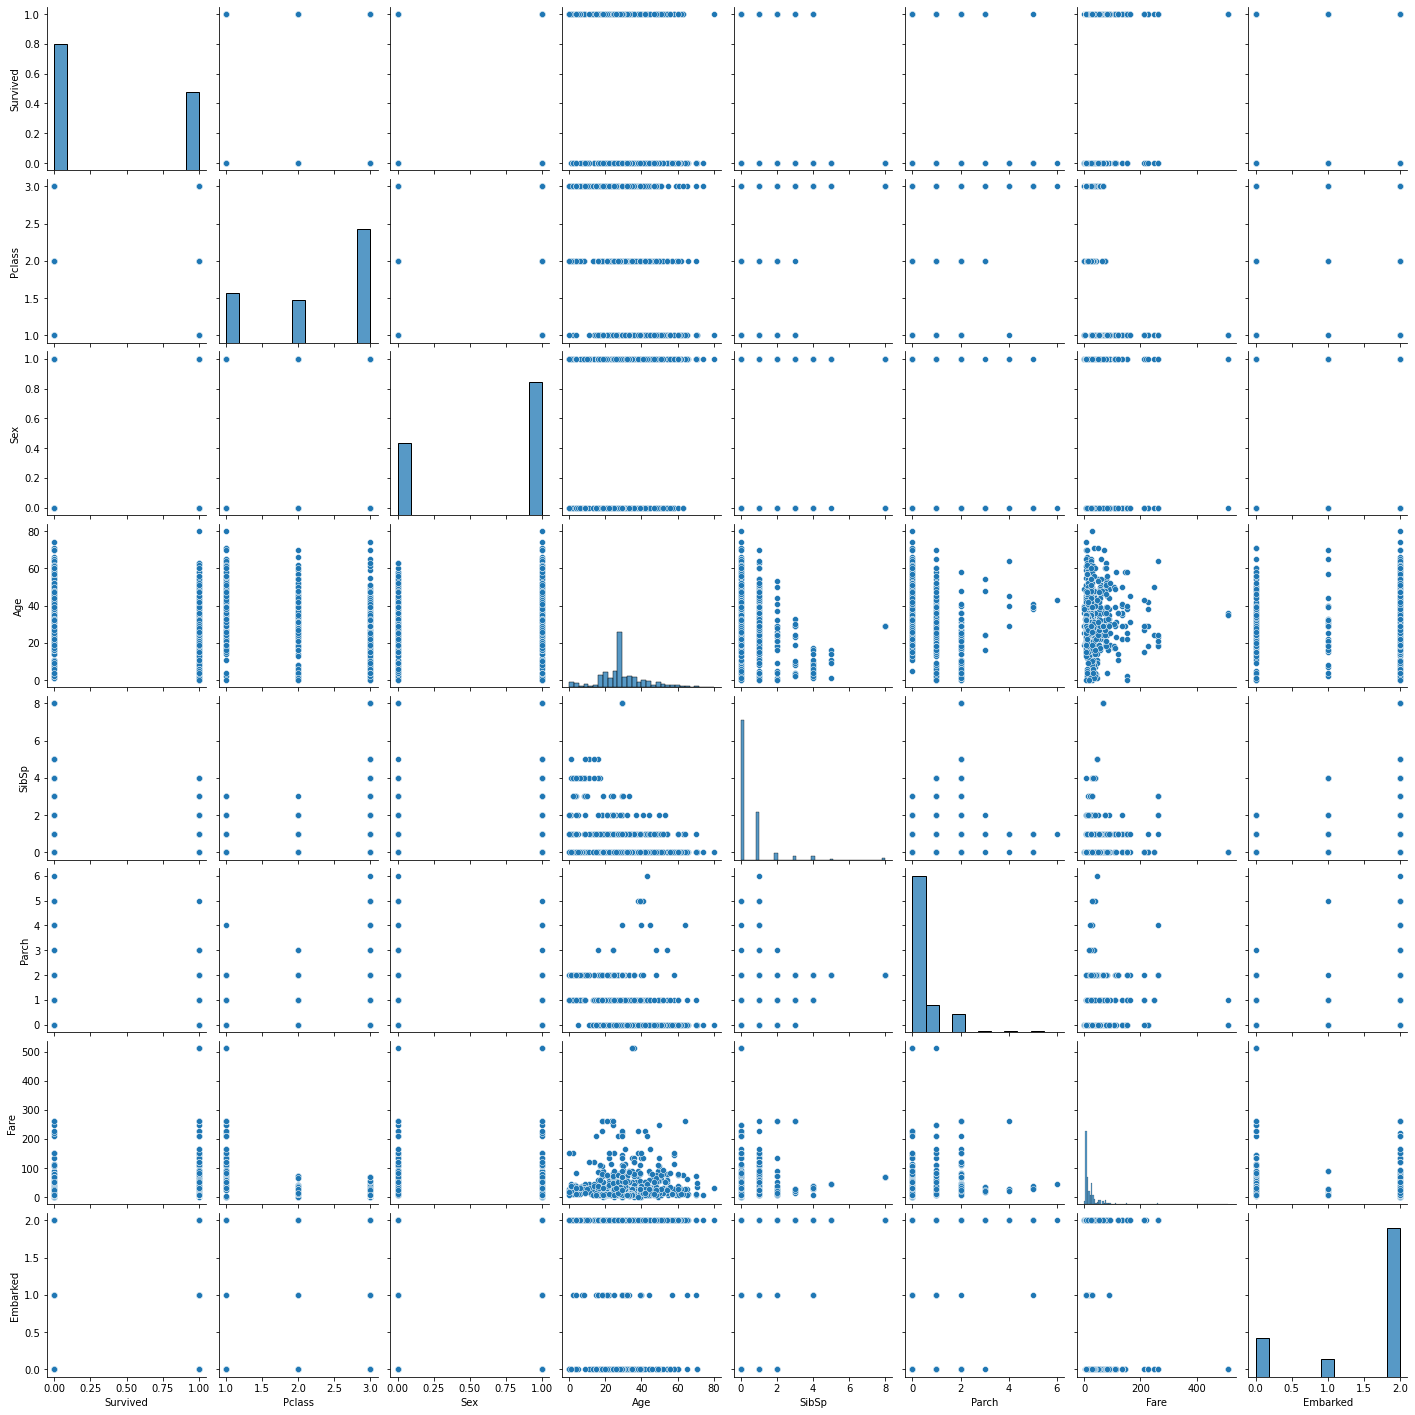

In [59]:
#We will try to visualize the distribution of feature values using pairplots
sns.pairplot(train)
plt.show()

*Exploring the relationship between different features and our target variable*

PClass and Survived

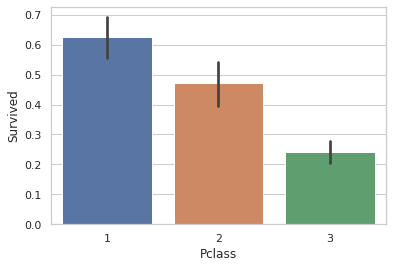

In [60]:
#PClass/Survive visualizations
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Pclass', y='Survived', data=train)

SibSp 

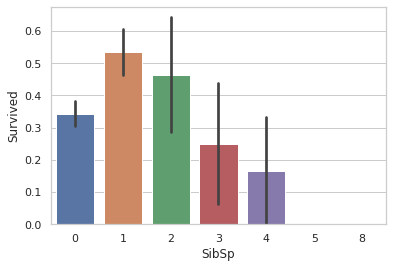

In [61]:
#SibSp/Survive visualizations
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='SibSp', y='Survived', data=train)

Parch

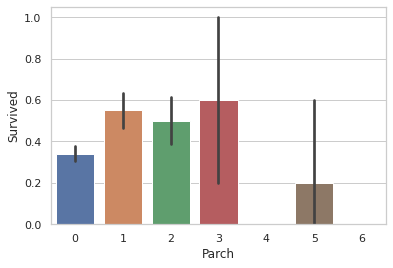

In [62]:
#Parch/Survive visualizations
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Parch', y='Survived', data=train)

Embarked

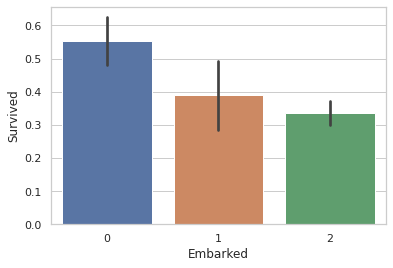

In [63]:
#Embarked/Survive visualizations
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Embarked', y='Survived', data=train)

Sex

In [64]:
train.groupby('Sex')['Survived'].sum()

Sex
0    231
1    109
Name: Survived, dtype: int64

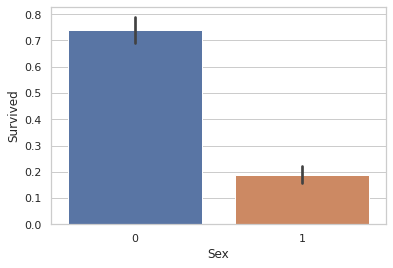

In [65]:
#Sex/Survive visualizations
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Sex', y='Survived', data=train)

Fare

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '')

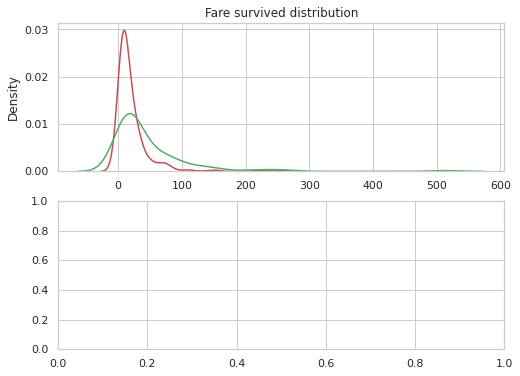

In [66]:
#Fare/Survived visualization

fig, axes = plt.subplots(2,1,figsize=(8,6))

ax0 = axes[0]
ax0.set_title('Fare survived distribution')
k1 = sns.distplot(train[train.Survived==0].Fare, hist=False, color='r', ax=ax0, label='Not Survive')
k2 = sns.distplot(train[train.Survived==1].Fare, hist=False, color='g', ax=ax0, label='Survived')
ax0.set_xlabel('')

Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '')

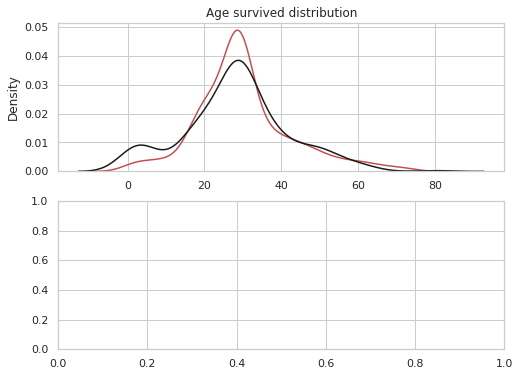

In [67]:
fig, axes = plt.subplots(2,1,figsize=(8,6))
ax0 = axes[0]
ax0.set_title('Age survived distribution')
k1 = sns.distplot(train[train.Survived==0].Age, hist=False, color='r', ax=ax0, label='Not Survive')
k2 = sns.distplot(train[train.Survived==1].Age, hist=False, color='k', ax=ax0, label='Survived')
ax0.set_xlabel('')

In [68]:
##From the above, we realize that
# PClass - Class 1 had the highest survival chances, and class 3 has the lowest survival rate
# Female passengers had higher survival chances than males
# Those who paid more fare had higher survival chances than those who did not

**Correlation**

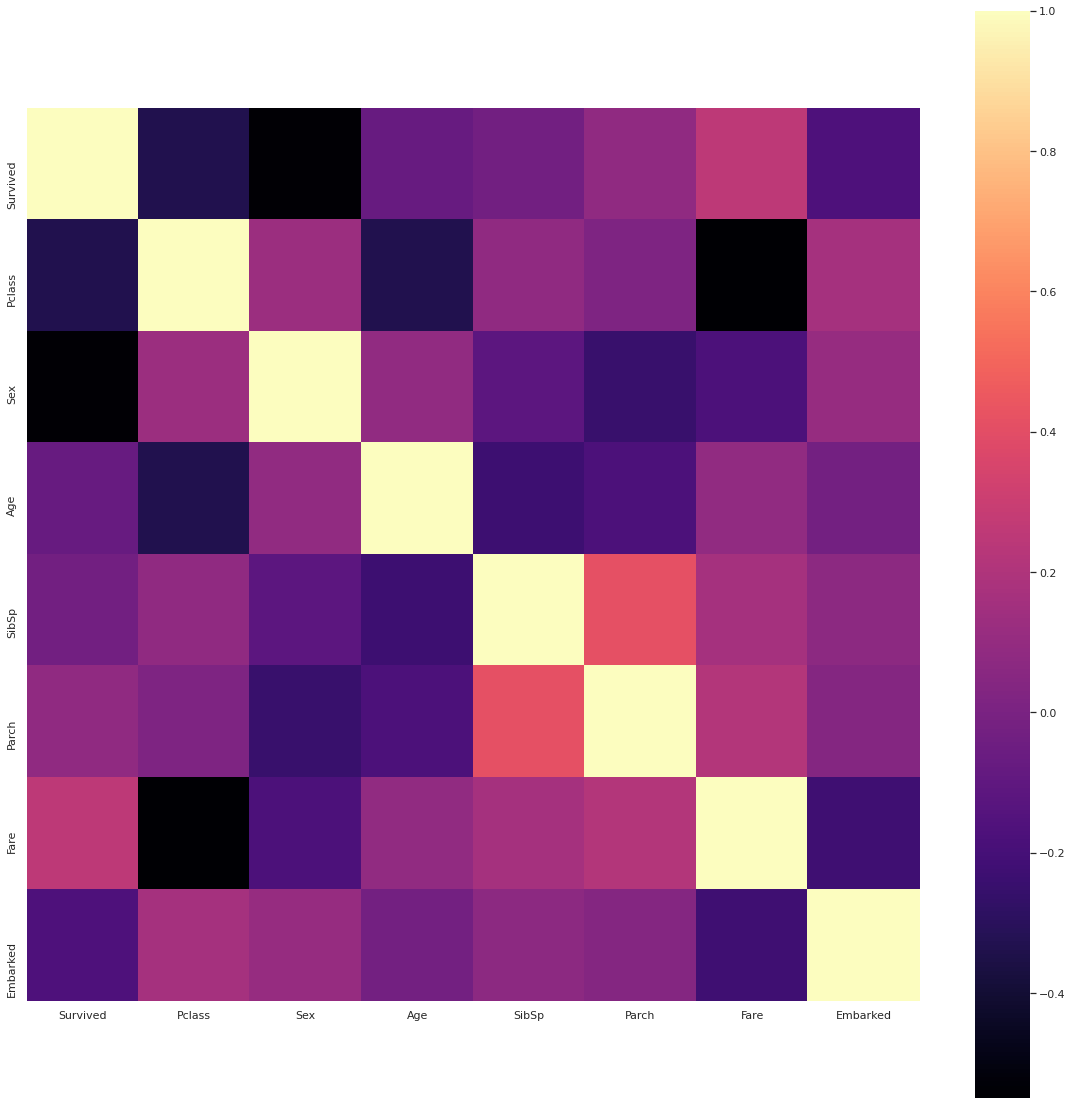

In [69]:
corr = train.corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(corr,vmax=1, cmap= 'magma', annot=False, square=True)
plt.show()

In [70]:
corr_list= corr['Survived'].sort_values(axis=0,ascending=False)
corr_list

Survived    1.000000
Fare        0.255447
Parch       0.083151
SibSp      -0.034040
Age        -0.072695
Embarked   -0.169718
Pclass     -0.335549
Sex        -0.541585
Name: Survived, dtype: float64

KNN Model results can be affected by multicollinearity hence we will check for instances of it using the VIF

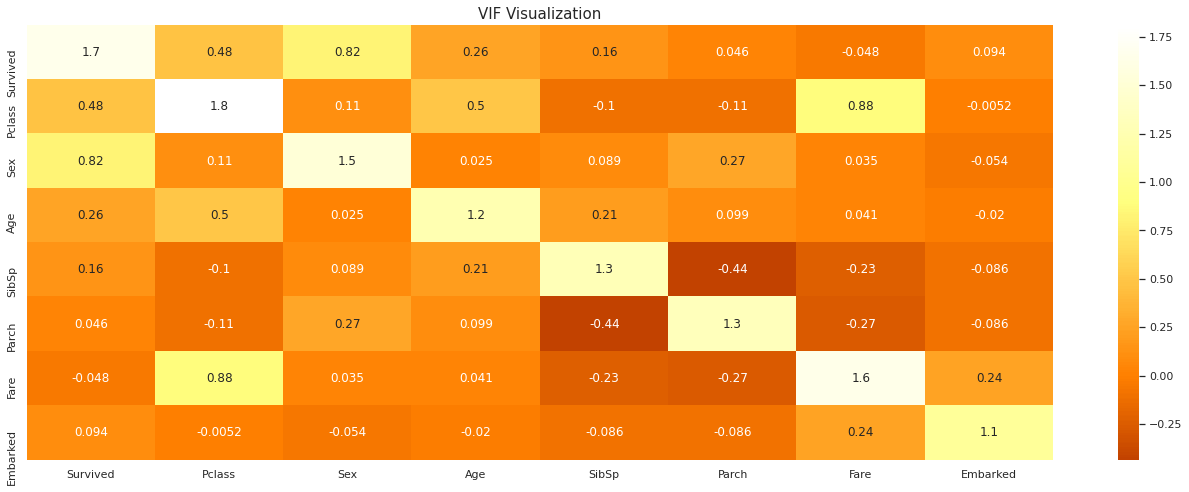

In [71]:
#Visualzing the VIF using a heatmap

vif = pd.DataFrame(np.linalg.inv(corr.values),index=corr.index,columns=corr.columns )
plt.figure(figsize = (23, 8))
sns.heatmap(vif, annot = True, center = 0, cmap="afmhot")
plt.title('VIF Visualization', fontsize = 15)
plt.show()

There is no high multicollinearity with our data hence we will move to the next step of building our models

#**Implementing the Solution**

In [72]:
#We will now build a K-Nearest Neighbours model to predict whether a passenger survived or not
#According to our instrutions, we are to Randomly partition each dataset into two parts i.e 80 - 20  sets.
#We will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

In [73]:
#We will define our train and test features 

X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y = train['Survived']


In [74]:
#Since KNN is a distance based algorithm, All such distance based algorithms are affected by the scale of the variables hence we will need to scale our features

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.82520863,  0.73534203, -0.57802333, ..., -0.47432585,
        -0.49673282,  0.58683958],
       [-1.57221121, -1.35991138,  0.65537059, ..., -0.47432585,
         0.79153916, -1.93955453],
       [ 0.82520863, -1.35991138, -0.26967485, ..., -0.47432585,
        -0.49673282,  0.58683958],
       ...,
       [ 0.82520863, -1.35991138, -0.03841349, ...,  2.00611934,
        -0.17466483,  0.58683958],
       [-1.57221121,  0.73534203, -0.26967485, ..., -0.47432585,
        -0.03376008, -1.93955453],
       [ 0.82520863,  0.73534203,  0.19284787, ..., -0.47432585,
        -0.49673282, -0.67635748]])

80/20 train and test splits

In [76]:
# Our first split will be based on an 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [77]:
#Fitting our model 

clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)

In [78]:
# predicting 

y_pred = clf.predict(X_test)

# comparing the actual and predicted values

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [79]:
#Evaluating our model
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7078651685393258

 Confusion matrix
[[80 25]
 [27 46]]

 Classification report
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       105
           1       0.65      0.63      0.64        73

    accuracy                           0.71       178
   macro avg       0.70      0.70      0.70       178
weighted avg       0.71      0.71      0.71       178



In [80]:
##The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives
##Our accuracy score is at 70% 
##We will now compare with an optimized model to compare the scores

70/30 splits

In [81]:
# Our second split will be based on an 70/30 split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [82]:
#Fitting our model 

clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)

In [83]:
# predicting 

y_pred = clf.predict(X_test)

# comparing the actual and predicted values

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [84]:
#Evaluating our model
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7228464419475655

 Confusion matrix
[[123  34]
 [ 40  70]]

 Classification report
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       157
           1       0.67      0.64      0.65       110

    accuracy                           0.72       267
   macro avg       0.71      0.71      0.71       267
weighted avg       0.72      0.72      0.72       267



*KNN: 60/40 splits*

In [85]:
# Our second split will be based on an 60/40 split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

In [86]:
#Fitting our model 

clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)

In [87]:
# predicting 

y_pred = clf.predict(X_test)

# comparing the actual and predicted values

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [88]:
#Evaluating our model
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7247191011235955

 Confusion matrix
[[169  47]
 [ 51  89]]

 Classification report
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       216
           1       0.65      0.64      0.64       140

    accuracy                           0.72       356
   macro avg       0.71      0.71      0.71       356
weighted avg       0.72      0.72      0.72       356



In [89]:
##Findings
#1. Our best performing model is the one with the 60/40 split based on an accuracy score of 72.4% and the precision, recall and f1- score.
#  The low scores could be a result of different factors i.e data accuracy, 
#We will try to improve our model performance using optimization techniques learnt and testing it against our test dataset

#**Challenging the solution**

*Optimization of the KNN model*

In [90]:
#We will try to find the best value of k to use using the best model we got in our tests above

In [91]:
#Finding the best value of K

k_values = range(1,15)
score = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    y_pred = knn_clf.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_pred))


In [92]:
##Visualizing the scores to pick the best value of k

Text(0, 0.5, 'Accuracy')

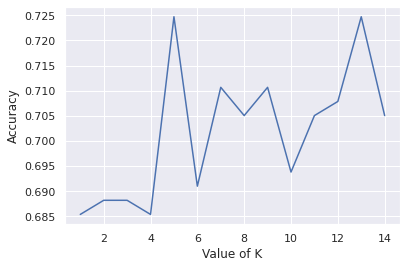

In [93]:
plt.plot(k_values, score)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

#K-value of 5 has the highest accuracy

*Hyperparameter Tuning*

In [94]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y = train['Survived']

In [95]:
#Defining the hyperparameters we will use
#n_neighbors = list(range(1,30))
#n_neighbors = n_neighbors
#leaf_size = list(range(1,30))
#p = [1,2]
#metric = ['manhattan', 'euclidean', 'minkowski']

In [96]:
#Creating a dictionary with the hyperparameter values
#hyperparameters = dict(leaf_size = leaf_size, p=p, metric = metric)

hyperparameters={'n_neighbors': np.arange(1,20), 'weights':['uniform', 'distance']}

In [97]:
##Our splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

#Gridsearh to find best params
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(), hyperparameters,cv=5, scoring = 'accuracy')
clf = clf.fit(X_train, y_train)

print(clf.best_params_)

{'n_neighbors': 5, 'weights': 'uniform'}


In [98]:
#Creating a better model based on the parameters given to us by the greadsearch

In [99]:
# predicting and evaluating the model

y_pred = clf.best_estimator_.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [100]:
#Evaluating our model
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7247191011235955

 Confusion matrix
[[169  47]
 [ 51  89]]

 Classification report
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       216
           1       0.65      0.64      0.64       140

    accuracy                           0.72       356
   macro avg       0.71      0.71      0.71       356
weighted avg       0.72      0.72      0.72       356



In [101]:
##Our model is still not in its best form, this leaves room for exploration of other aspects of our datasets that we might have overlooked eg. The names and Cabin column can be used to extract titles
##And Cabin labels that could signify class


**Comparing the performance of Random forest classifier with our KNN Model**

In [102]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y = train['Survived']

In [103]:
# set the gridsearch parameters for the RandomForest Classifier
rf_param_grid={'n_estimators': [10, 15, 20], 'max_depth':[5, 10, 15], \
                 'max_leaf_nodes':np.arange(2,10), 'min_samples_split':[5, 10, 15]}

In [104]:
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [105]:
# predicting and evaluating the model


y_pred = rf_grid_search.best_estimator_.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [106]:
#Evaluating our model
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7865168539325843

 Confusion matrix
[[188  28]
 [ 48  92]]

 Classification report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       216
           1       0.77      0.66      0.71       140

    accuracy                           0.79       356
   macro avg       0.78      0.76      0.77       356
weighted avg       0.78      0.79      0.78       356



In [107]:
##According to the confusion matrix and F1 scores, the Random forest model does a better job at predicting our traget variable with an accuracy score at 78%

In [108]:
#Convert the dataframe to a list
tes_t= test.values.tolist()

# predict using the test dataset
y_pred = clf.predict(tes_t)

#Adding the predicted values to our dataset
test['Survived'] = y_pred
test.sample(5)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
284,3,0,2,1,1,20,2,1
296,2,0,1,1,2,41,0,1
325,3,1,23,0,0,7,2,0
5,3,1,14,0,0,9,2,0
222,2,0,22,0,0,10,2,0


#**Conclusion and Recommendations**

In [109]:
#While challenging the solution using Random forests, we can see a clear improvement in accuracy levels compared to our K-Nearest Neighbors which averaged accuracy levels of 70-74%
#and a high number of false positives denoted by the confusion matrix and f1-scores. This means that our models were not able to classify survival as desired while determining our metrics of success.
#This could mean that there is more manipulation that could be achieved with our features to get higher accuracy scores as has been recommended in previous sections.
#